In [ ]:
import pandas as pd
import scipy
import numpy as np
from scipy.stats import kstwo
import matplotlib.pyplot as plt
from scipy.stats import kstwobign
from scipy.stats import ksone
from statsmodels.distributions.empirical_distribution import ECDF

# Критерий согласия Колмогорова

Здесь и ниже **S** = 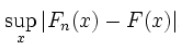

Fn - эмпиричская функция распределения (то есть та, которую мы наблюдаем), F - теоретическая (с которой сравниваем)

Ниже приведены графики распределения Колмогорова. И, соответственно, график распределения статистики **корень из n * S**. В python это функция kstwobign.ppf(q, n), где q - квантиль, n - размер выборки.


Понятия не имею, почему параметр n равен 0, но в таком виде квантили совпадают с табличными. При большем n график просто смещается по оси ox, его форма не меняется

При достаточно больших n значение статистики **корень из n * S** (рассчитанный супремум разности между теоретическим и эмпирическим распределением) стремится к распределению Колмогорова. Достаточно большие n: **n >= 5**. :

Значит для проверки гипотезы с помощью критерия Колмогорова, нужно статистику **корень из n * S** сравнивать с критическим значением (квантилем соответствующего уровня) распределения Колмогорова.

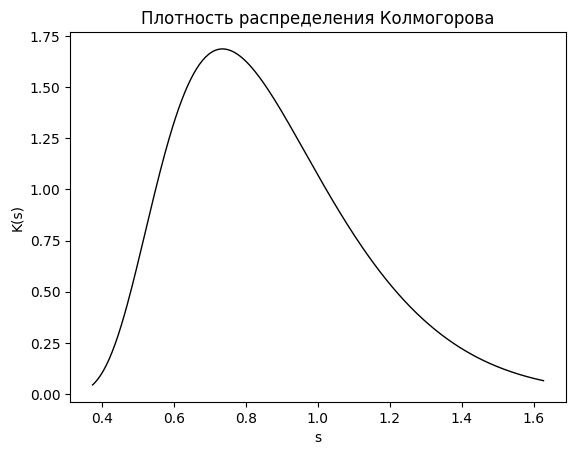

In [ ]:
x = np.linspace(kstwobign.ppf(0.001, 0),
                kstwobign.ppf(0.99, 0), 300)
plt.title("Плотность распределения Колмогорова")
plt.xlabel("s")
plt.ylabel("K(s)")
plt.plot(x, kstwobign.pdf(x, 0), lw=1, color = 'black')

###Расчет квантилей и сверка с табличными

In [ ]:
np.round([kstwobign.ppf(0.85, 0), kstwobign.ppf(0.9, 0), kstwobign.ppf(0.95, 0), kstwobign.ppf(0.975, 0), kstwobign.ppf(0.99, 0)], 4)

array([1.1379, 1.2238, 1.3581, 1.4802, 1.6276])

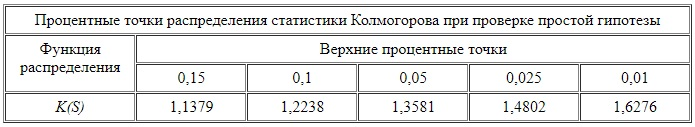

In [ ]:
x1 = kstwobign.pdf(x, 0)
x1 = np.sort(x1)
y = kstwobign.cdf(x1, 0)

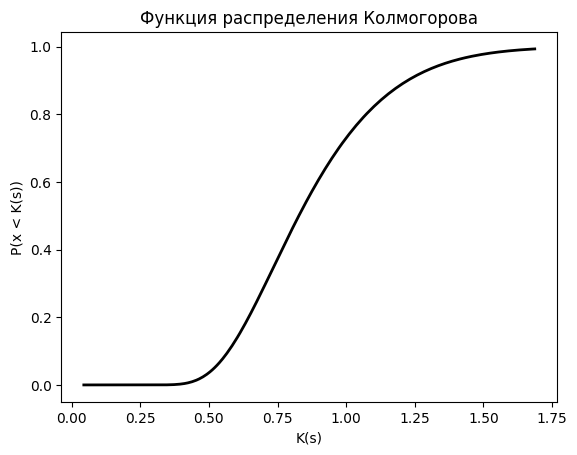

In [ ]:
plt.title("Функция распределения Колмогорова")
plt.xlabel("K(s)")
plt.ylabel("P(x < K(s))") # ось ординат
plt.plot(x1, y, lw=2, color='black')

Построенная функция распределения может быть описана табличкой ниже

[Эту и другие таблички можно найти в этой книжке](https://studizba.com/files/show/djvu/3465-9-bol-shev-l-n-smirnov-n-v-tablicy.html)

## 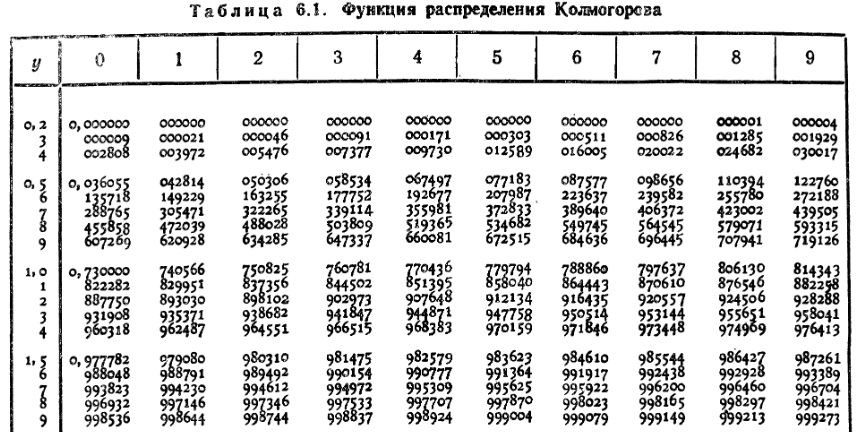

Ниже пример: значению 0.43 должно соответствовать значение примерно 0.0075. Погрешность, очевидно, из-за значения х, не точно равного табличному.

In [ ]:
x1[102], y[102]

(0.3731167006713731, 0.0009519809448076236)

##Теперь важная вещь! Существует также распределение величины Dn (статистики Колмогорова), которая равна супремуму разности эмпирической и теоретической функции **(не умноженному на корень из n)**. Это, насколько я понимаю, не то же самое, что распределение Колмогорова. Не знаю, в каких случаях нужно рассчитывать просто Dn, но если рассчитываем именно его, то сравнивать нужно с квантилем распределения этой величины (в питоне это kstwo).

In [ ]:
n = 50

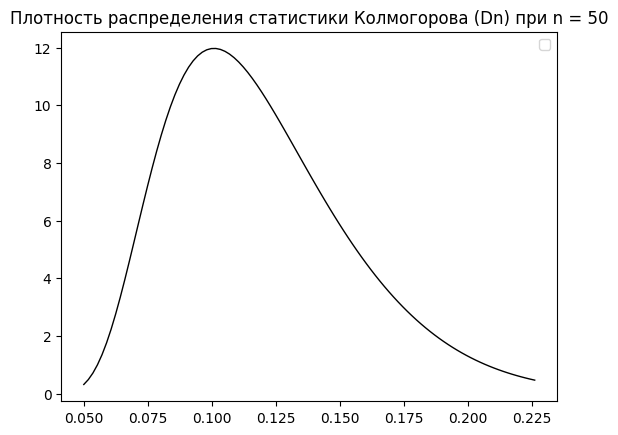

In [ ]:
x = np.linspace(kstwo.ppf(0.001, n),
                kstwo.ppf(0.99, n), 100)
plt.title("Плотность распределения статистики Колмогорова (Dn) при n = 50")
#plt.axvline(x=s, color='red', linestyle='--', label='Рассчитанная статистика')
plt.plot(x, kstwo.pdf(x, n), lw=1, color = 'black')
plt.legend()

##Вот что есть на эту тему в лекциях

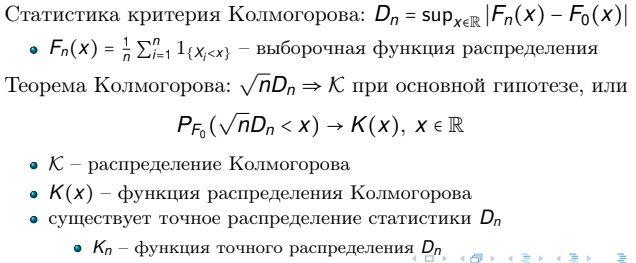

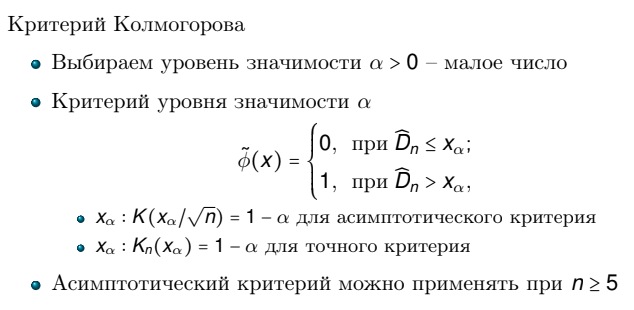

Соответственно, все, что сказано выше на эту тему подтверждается. Если мы считаем только Dn, то сравниваем с квантилем точного распределения Dn (kstwo). Если считаем Dn*(Корень из n), тогда сравниваем с квантилем распределения Колмогорова! (kstwobign)

# Лирическое отступление про всеми любимый p-value!



---





[Классная статья о p-value в маркетинге](https://neiros.ru/blog/statistics/p-znachenie-i-statisticheskie-issledovaniya-v-marketinge/)

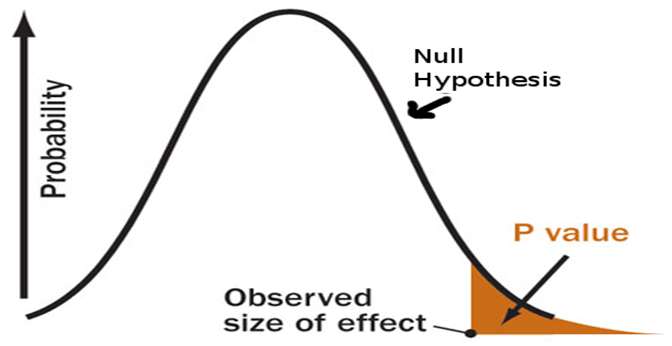

P-value - вероятность получить такие данные как у нас в реальности, где верна нулевая гипотеза. Это формулировка для принятия решения на основании p-value. Когда понимаем, что оно прям очень маленькое (когда меньше заданного уровня значимости), значит, что вероятность получить такие данные как у нас на руках в реальности, где верна нулевая гипотеза, очень маленькая. А значит, нулевую гипотезу отклоняем. С вероятностью ошибиться, равной заданному уровню значимости.

То есть теоретически, p-value можно посчитать так: находим вероятность, с которой случайная величина будет меньше найденного значения статистики (функция cdf(S), что то же самое, что найти точку на графике функции распределения, соответствующую S или площадь под кривой плотность вероятности от -бесконечности до рассчитанного значения статистики).

Соответственно, вероятность того, что случайная величина превысит рассчитанное значение статистики = 1 - (вероятность, с которой случайная величина будет меньше найденного значения статистики).
А это и есть p-value!!!

Хочется проверить данное утверждение :)

Сгенерируем выборку из стандартного нормального распределения

In [ ]:
n = 50

In [ ]:
x = scipy.stats.norm.rvs(size = n)

Проверим на согласие с нормальным распределением с параметрами (0.1, 1)

In [ ]:
scipy.stats.ks_1samp(x, scipy.stats.norm.cdf, args=(0, 1.8), alternative='two-sided')

KstestResult(statistic=0.2594993239919332, pvalue=0.0018536947155762817, statistic_location=0.9465138958943441, statistic_sign=1)

In [ ]:
s = scipy.stats.ks_1samp(x, scipy.stats.norm.cdf, args=(0, 1.8), alternative='two-sided').statistic

Рассчитанное значение статистики 0.09406907621562932. Что нужно сделать? Нужно рассчитать вероятность, что случайная величина примет значение меньше, чем рассчитанное (при условии, конечно, что она принадлежит распределению Колмогорова. А условие это выполняется, если нулевая гипотеза верна). Затем отнять эту вероятность от 1.

In [ ]:
1 - kstwo.cdf(s, n) # по идее это p-vaue
# значение функции распределения (куммулятивной функции)

0.0018536947155762817

Как здорово, все совпало!!

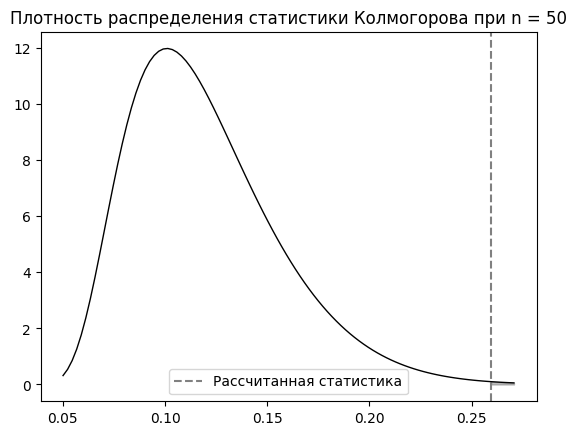

In [ ]:
x = np.linspace(kstwo.ppf(0.001, n),
                kstwo.ppf(0.999, n), 100)
y = kstwo.pdf(x, n)
plt.title("Плотность распределения статистики Колмогорова при n = 50")
plt.axvline(x=s, color='grey', linestyle='--', label='Рассчитанная статистика')
plt.plot(x, y, lw=1, color = 'black')
plt.fill_between(x, y, where=(x > s), color='grey', alpha=0.5)
plt.legend()

Площадь под кривой справа от рассчитанного значения статистики и есть p-value - достигнутый уровень значимости.



---





##**Задание из ИДЗ по матстату** (пример проверки согласия критерием Колмогорова)

In [ ]:
n = 50
x = pd.read_csv('/content/drive/MyDrive/for myself/data.csv')
x = np.array(x.points)
scipy.stats.ks_1samp(x, scipy.stats.norm.cdf, args=(-7, 2), alternative='two-sided')

KstestResult(statistic=0.8793692142423424, pvalue=2.4858947359756858e-46, statistic_location=-3.901, statistic_sign=-1)

Квантиль распределения Колмогорова для уровня значимости 0.02

In [ ]:
kstwobign.ppf(0.98, 0)

1.5174269646320033

In [ ]:
info = scipy.stats.ks_1samp(x, scipy.stats.norm.cdf, args=(-7, 2), alternative='two-sided')
s = info.statistic
np.sqrt(n)*s

6.218079345574463

In [ ]:
x = sorted(x)
F = [i/n for i in range(1, n+1)]
G = scipy.stats.norm.cdf(x, -7, 2)


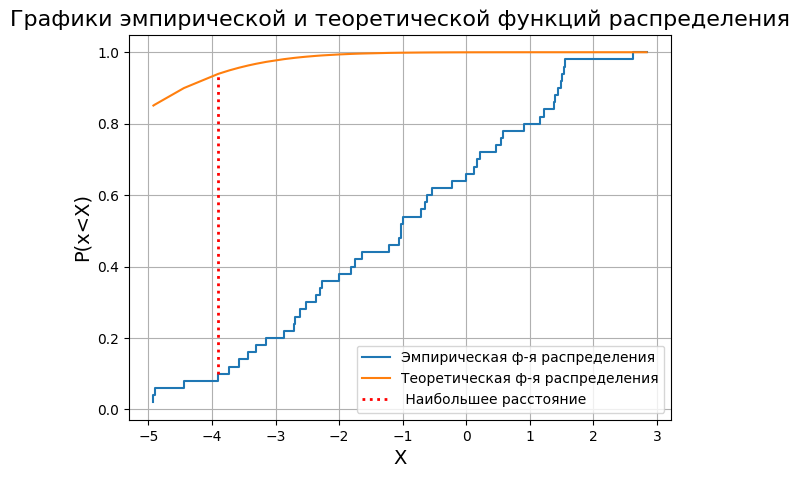

In [ ]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()
ax.set_title("Графики эмпирической и теоретической функций распределения", fontsize=16)
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("P(x<X)", fontsize=14)

# можно так нарисовать эмпирическое распределение
ecdf = ECDF(x)
ax.step(ecdf.x, ecdf.y, label='Эмпирическая ф-я распределения')

# или так
#F = [i/n for i in range(1, n+1)]
#ax.step(x, F, label = 'Эмпирическая ф-я распределения')

ax.plot(x, G, label = 'Теоретическая ф-я распределения')
ax.axvline(info.statistic_location, ymin = F[x.index(info.statistic_location)+2], ymax=G[x.index(info.statistic_location)-1], ls=':', color = 'red', lw=2, label = ' Наибольшее расстояние')
ax.grid()
ax.legend()

На графике продемонстрированы эмпирическая функция распределения и функция распределения, с которой мы хотим проверить согласие. Статистика критерия Колмогорова ищет наибольшее расстояние между ними (на графике показано красным пунктиром).

Рассчитаное значение статистики больше критического значения, значит нулевую гипотезу отвергаем, т.е. распределение не согласуется с нормальным с параметрами (-7, 2).

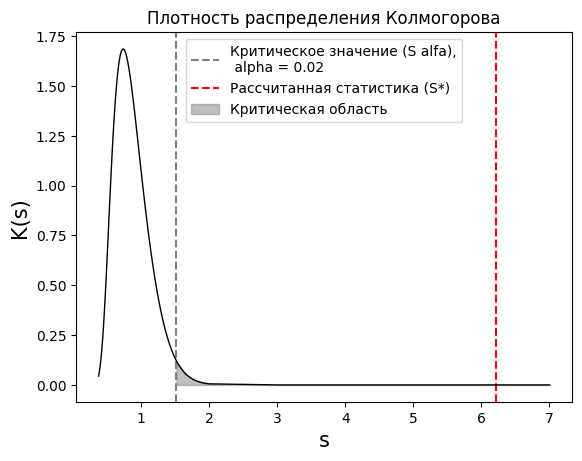

In [ ]:
x = np.linspace(kstwobign.ppf(0.001, 0),
                kstwobign.ppf(0.999, 0), 100)
x = np.append(x, [2, 3, 4, 5, 6, 7])
y = kstwobign.pdf(x, 0) # значения функции плотность распределения
salfa = kstwobign.ppf(0.98, 0) # квантилль распределения
szv = np.sqrt(n)*s
plt.title("Плотность распределения Колмогорова")
plt.xlabel('s', fontsize = 15)
plt.ylabel('K(s)', fontsize = 15)
plt.axvline(x=salfa, color='grey', linestyle='--', label='Критическое значение (S alfa),\n alpha = 0.02')
plt.axvline(x=szv, color='red', linestyle='--', label='Рассчитанная статистика (S*)')
plt.fill_between(x, y, where=(x > salfa), color='grey', alpha=0.5, label='Критическая область')
plt.plot(x, y, lw=1, color = 'black')
plt.legend()

В задании также сказано рассчитать наибольший уровень значимости, при котором нет оснований отклонить данную гипотезу - и это еще одно определение p-value.

Мини-пояснение: если бы альфа (уровень значимости) был в точности равен p-value, у нас бы не было оснований отклонять гипотезу. Однако как только альфа становится больше, что p-value, мы гипотезу вынуждены отклонить. Соответственно, наибольший уровень значимости, на котором можно не отклонять гипотезу, это и есть p-value.

# Критерий согласия хи-квадрат (простая гипотеза)

**Что вообще такое распределение хи-квадрат?**

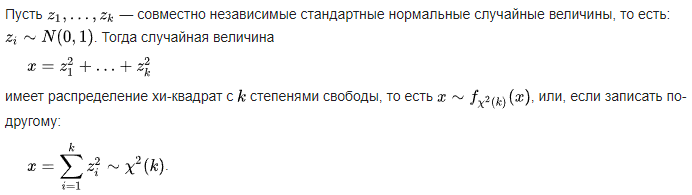




Определение из лекции:

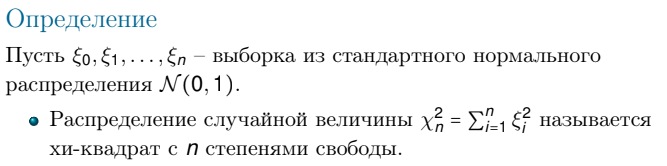

То есть хи-квадрат распределение это распределение квадаратов случайных величин, взятых из стандартного нормального распределения.

In [ ]:
n = 50
x = pd.read_csv('/content/drive/MyDrive/for myself/data.csv')
x = np.array(x.points)
x = sorted(x)

Нужно самостоятельно разбить область определения на интервалы. Рассчитать ожидаемую вероятность и фактическую вероятность (лиюо обе относительные, либо обе абсолютные). Важно, чтобы абсолютная вероятность каждого кусочка была больше 5.

In [ ]:
points = [-float('inf'), -3, -2, -1, 0.2, 1.3, float('inf')]

In [ ]:
p = scipy.stats.norm.cdf(points, -7, 2)

In [ ]:
f_obs = np.array([9, 8, 8, 9, 7, 9])
f_exp = np.array([p[i] - p[i-1] for i in range(1, len(p))])*50

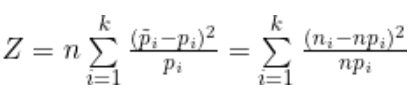

Первая формула - сравнение относительных частот. Если в функцию ниже подставить относительные частоты, то для получения корректного значения статистики, значение, полученное на выходе нужно умножить на n. Вторая формула - разница абсолютных частот. В таком случае полученное значение статистики из питоновской функции сразу будет верное. В данном случае реализована вторая формула (см. ячейку выше).

(array([9., 8., 8., 9., 7., 9.]),
 array([-4.921, -3.   , -2.   , -1.   ,  0.2  ,  1.3  ,  2.838]),
 <BarContainer object of 6 artists>)

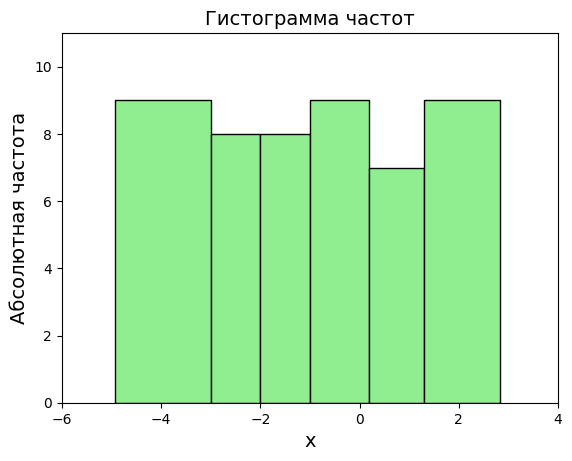

In [ ]:
points[0] = x[0]
points[-1] = x[-1]
plt.title('Гистограмма частот', fontsize = 14)
plt.ylabel("Абсолютная частота", fontsize = 14)
plt.xlabel("x", fontsize = 14)
plt.xlim(-6, 4)
plt.ylim(0, 11)
plt.hist(x, color = 'lightgreen', edgecolor = 'black',
         bins = points)

In [ ]:
scipy.stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=105981.65383020454, pvalue=0.0)

Рассчитаем квантиль распределения хи-квадрат со k-1 степенью свободы, где k - количество интервалов, на которые разбита область определения.

In [ ]:
df = len(f_obs)-1

In [ ]:
scipy.stats.chi2.ppf(0.98, df)

13.38822259903634

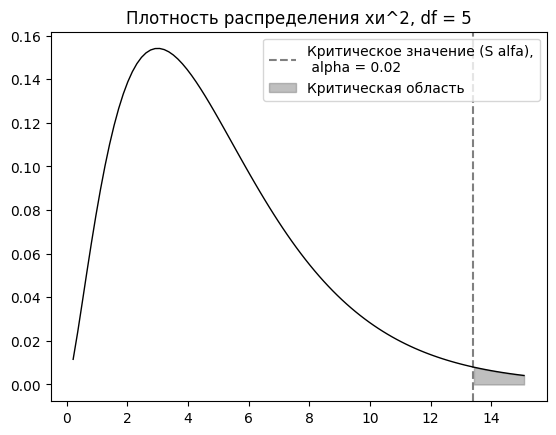

In [ ]:
x = np.linspace(scipy.stats.chi2.ppf(0.001, df),
                scipy.stats.chi2.ppf(0.99, df), 100)
salfa = scipy.stats.chi2.ppf(0.98, df)
y = scipy.stats.chi2.pdf(x, df)
plt.title("Плотность распределения хи^2, df = 5")
#plt.xlabel('s', fontsize = 15)
#plt.ylabel('K(s)', fontsize = 15)

plt.axvline(x=salfa, color='grey', linestyle='--', label='Критическое значение (S alfa),\n alpha = 0.02')
plt.fill_between(x, y, where=(x > salfa), color='grey', alpha=0.5, label='Критическая область')
plt.plot(x, y, lw=1, color = 'black')
plt.legend()

Рассчитанная статистика слишком большая, не хочу ее рисовать на графике - но она, очевидно, попала в критическую область, значит, нулевая гипотеза отклоняется.

#Критерий согласия хи-квадрат (сложная гипотеза)

Возможно, это касается всех сложных гипотез - для того, чтобы ее проверить, нужно минимизировать функцию (статистику). Тогда точка, в которой она достигла минимума - это искомые оценки параметров распределения.

А критическое значение стоит искать не по такому же распределению, как и при простой гипотезе. Например, для хи-квадрат это будет распределение хи-квадрат, но со степенями свободны k-1-m, где m-количество оцениваемых параметров.

In [ ]:
n = 50
x = pd.read_csv('/content/drive/MyDrive/for myself/data.csv')
x = np.array(x.points)

In [ ]:
f_obs = np.array([9, 8, 8, 9, 7, 9]) # наблюдаемые частоты
points = [-float('inf'), -3, -2, -1, 0.2, 1.3, float('inf')] # границы диапазонов

Напишем функцию, которую будем оптимизировать - в данной случае это функция, рассчитывающая значение статистики хи-квадрат, а зависит она от параметров теоретического распределения, к которому мы пытаемся приблизить эмпирическое. То есть в данном случае от параметров нормального распределения.

In [ ]:
def func(x):
  p = scipy.stats.norm.cdf(points, x[0], x[1])
  f_exp = np.array([p[i] - p[i-1] for i in range(1, len(p))])*50
  return scipy.stats.chisquare(f_obs, f_exp).statistic

In [ ]:
from scipy.optimize import minimize
x0 = np.array([x.mean(), x.std()])
res = minimize(func, x0, method='nelder-mead')
print(res)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.3481482044192197
             x: [-9.234e-01  2.364e+00]
           nit: 31
          nfev: 61
 final_simplex: (array([[-9.234e-01,  2.364e+00],
                       [-9.234e-01,  2.364e+00],
                       [-9.234e-01,  2.364e+00]]), array([ 3.481e-01,  3.481e-01,  3.481e-01]))


Ниже приведено минимальное найденное значение статистики

In [ ]:
res.fun

0.3481482044192197

Ниже представлены параметры нормального распределения, при которых получено минимального значение статистики

In [ ]:
res.x

array([-0.92344764,  2.36422188])

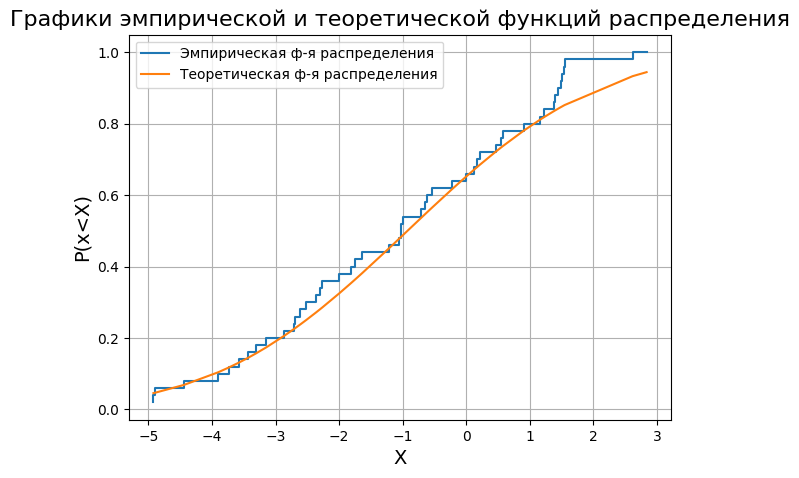

In [ ]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()
ax.set_title("Графики эмпирической и теоретической функций распределения", fontsize=16)
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("P(x<X)", fontsize=14)

# можно так нарисовать эмпирическое распределение
ecdf = ECDF(x)
ax.step(ecdf.x, ecdf.y, label='Эмпирическая ф-я распределения')

ax.plot(sorted(x), scipy.stats.norm.cdf(sorted(x), res.x[0], res.x[1]), label = 'Теоретическая ф-я распределения')
ax.grid()
ax.legend()

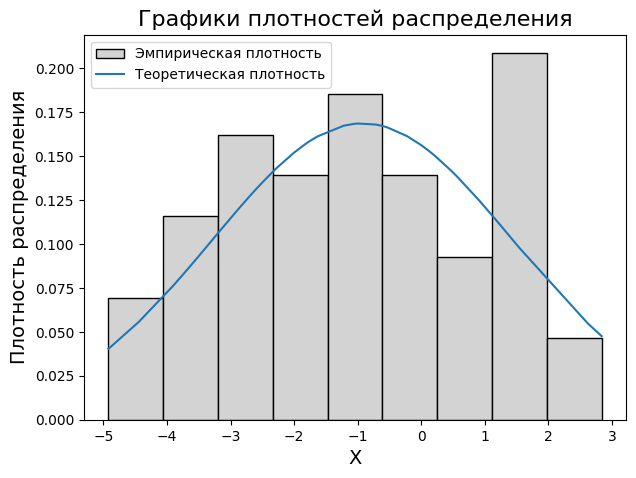

In [ ]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()
ax.set_title("Графики плотностей распределения", fontsize=16)
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Плотность распределения", fontsize=14)

plt.hist(x, color = 'lightgrey', edgecolor = 'black',
         bins = int((x.max() - x.min())/0.8), density=True, label = 'Эмпирическая плотность')

ax.plot(sorted(x), scipy.stats.norm.pdf(sorted(x), res.x[0], res.x[1]), label = 'Теоретическая плотность')
#ax.grid()
ax.legend()

Проверим теперь сложную гипотезу о согласии с нормальным законом распределения с найденными параметрами.

In [ ]:
df = len(f_obs)-3 # степени свободы
# len(f_obs)-1 - стандартное
# также отнимается число параметров, которое было оценено - в данном случае 2

Критическое значение статистики при уровне значимости 0.02

In [ ]:
scipy.stats.chi2.ppf(0.98, df)

9.837409311192593

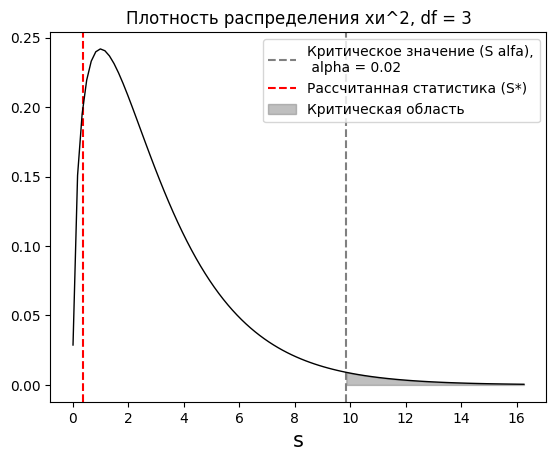

In [ ]:
x = np.linspace(scipy.stats.chi2.ppf(0.0001, df),
                scipy.stats.chi2.ppf(0.999, df), 100)

y = scipy.stats.chi2.pdf(x, df) # значения функции плотность распределения
salfa = scipy.stats.chi2.ppf(0.98, df) # квантилль распределения
szv = res.fun
plt.title("Плотность распределения хи^2, df = 3")
plt.xlabel('s', fontsize = 15)
#plt.ylabel('K(s)', fontsize = 15)
plt.axvline(x=salfa, color='grey', linestyle='--', label='Критическое значение (S alfa),\n alpha = 0.02')
plt.axvline(x=szv, color='red', linestyle='--', label='Рассчитанная статистика (S*)')
plt.fill_between(x, y, where=(x > salfa), color='grey', alpha=0.5, label='Критическая область')
plt.plot(x, y, lw=1, color = 'black')
plt.legend()

Рассчитаем p-value

In [ ]:
1 - scipy.stats.chi2.cdf(szv, df)

0.9507326910195841

In [ ]:
p = scipy.stats.norm.cdf(points, res.x[0], res.x[1])
f_exp = np.array([p[i] - p[i-1] for i in range(1, len(p))])*50
scipy.stats.chisquare(f_obs, f_exp, 2) # последний параметр показывает, сколько параметров оценивалось

Power_divergenceResult(statistic=0.3481482044192197, pvalue=0.9507326910195841)

Можно видеть, что p-value совпадают